#**Multilinear Regression Model: Concrete Compressive Strength Prediction**

###**Description**

This project aims to predict concrete compressive strength using a dataset comprising 1030 observations across 9 attributes, including factors like cement, water, aggregate, fly ash, age and others. Through exploratory data analysis and correlation analysis, we'll identify key predictors highly correlated with concrete strength. Subsequently, we'll select relevant features, build regression models, evaluate their performance, interpret results, and provide actionable insights for optimizing concrete strength.

------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Concrete_Data.csv")

In [ ]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.shape

(1030, 9)

In [ ]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age (day)                      1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


We can clearly see that the data does not have have any null value. Let us check for and remove duplicate values(if found)

### Checking Duplicates

In [ ]:
df.duplicated().value_counts()

False    1005
True       25
dtype: int64

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

###Checking Outliers

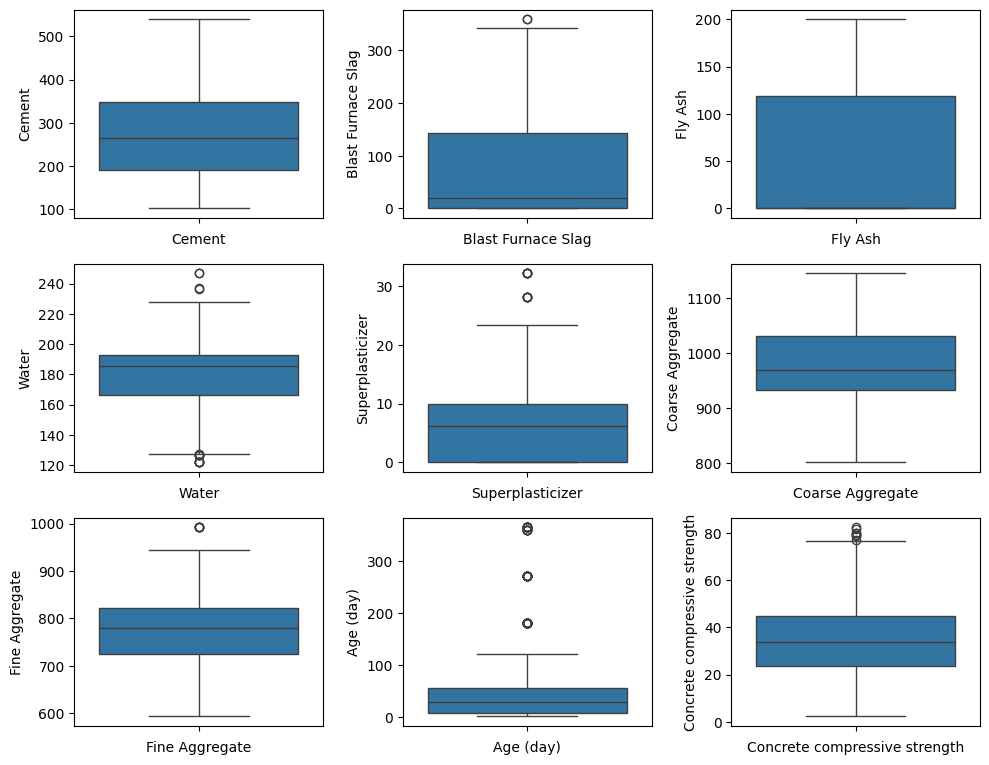

In [ ]:
plt.figure(figsize = (10,10), facecolor = 'white')
plotnumber = 1
for i in df.columns:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i, fontsize = 10)
    plotnumber +=1
plt.tight_layout()
plt.show()

In [ ]:
outliers=['Water','Superplasticizer','Age (day)','Fine Aggregate','Blast Furnace Slag']

In [ ]:
#This Code is doing IQR based filtering
def outlier_capping(dataframe: pd.DataFrame, outliers:list):
 out_df = dataframe.copy()
 for i in outliers:
  q1 = out_df[i].quantile(0.25)
  q3 = out_df[i].quantile(0.75)
  iqr = q3 - q1
  upper_limit = q3 + 1.5 *iqr
  lower_limit = q3 - 1.5 *iqr
  out_df.loc[out_df[i] >upper_limit, i] = upper_limit
  out_df.loc[out_df[i] <lower_limit, i] = lower_limit
 return out_df
out_df = outlier_capping(dataframe = df, outliers=outliers)

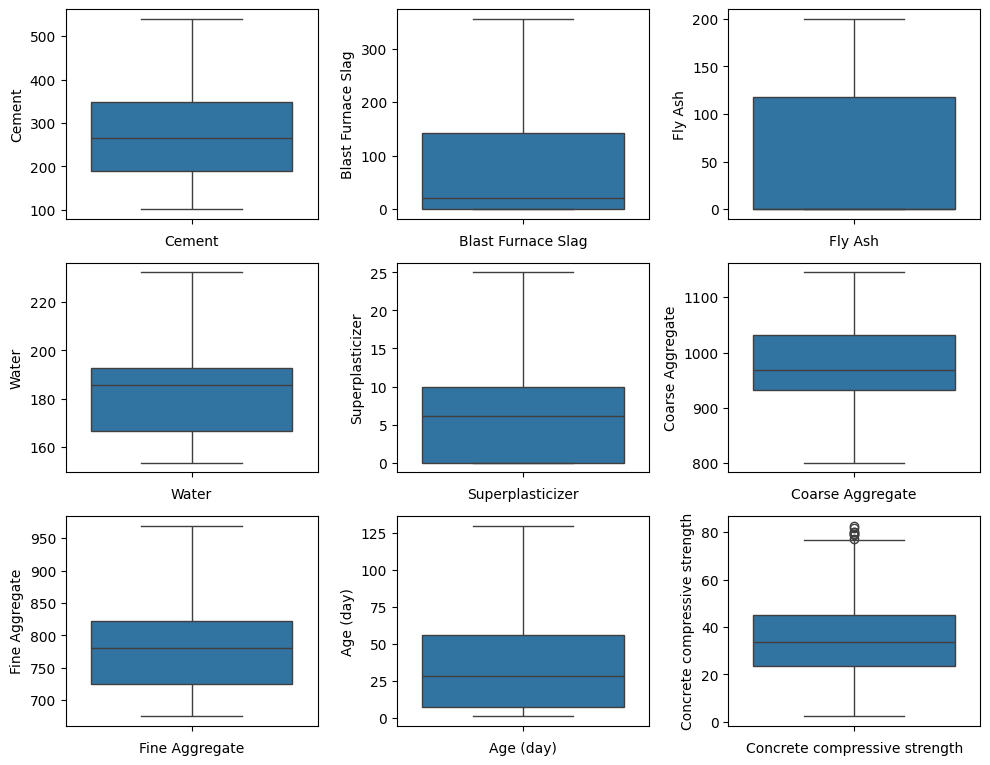

In [ ]:
plt.figure(figsize = (10,10), facecolor = 'white')
plotnumber = 1
for i in out_df.columns:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(out_df[i])
    plt.xlabel(i, fontsize = 10)
    plotnumber +=1
plt.tight_layout()
plt.show()

## **Linearity**

Linear regression works on the data where the independent variables shares a linear relationship with the dependent variables. Let us plot a scatter plot to see the relation.

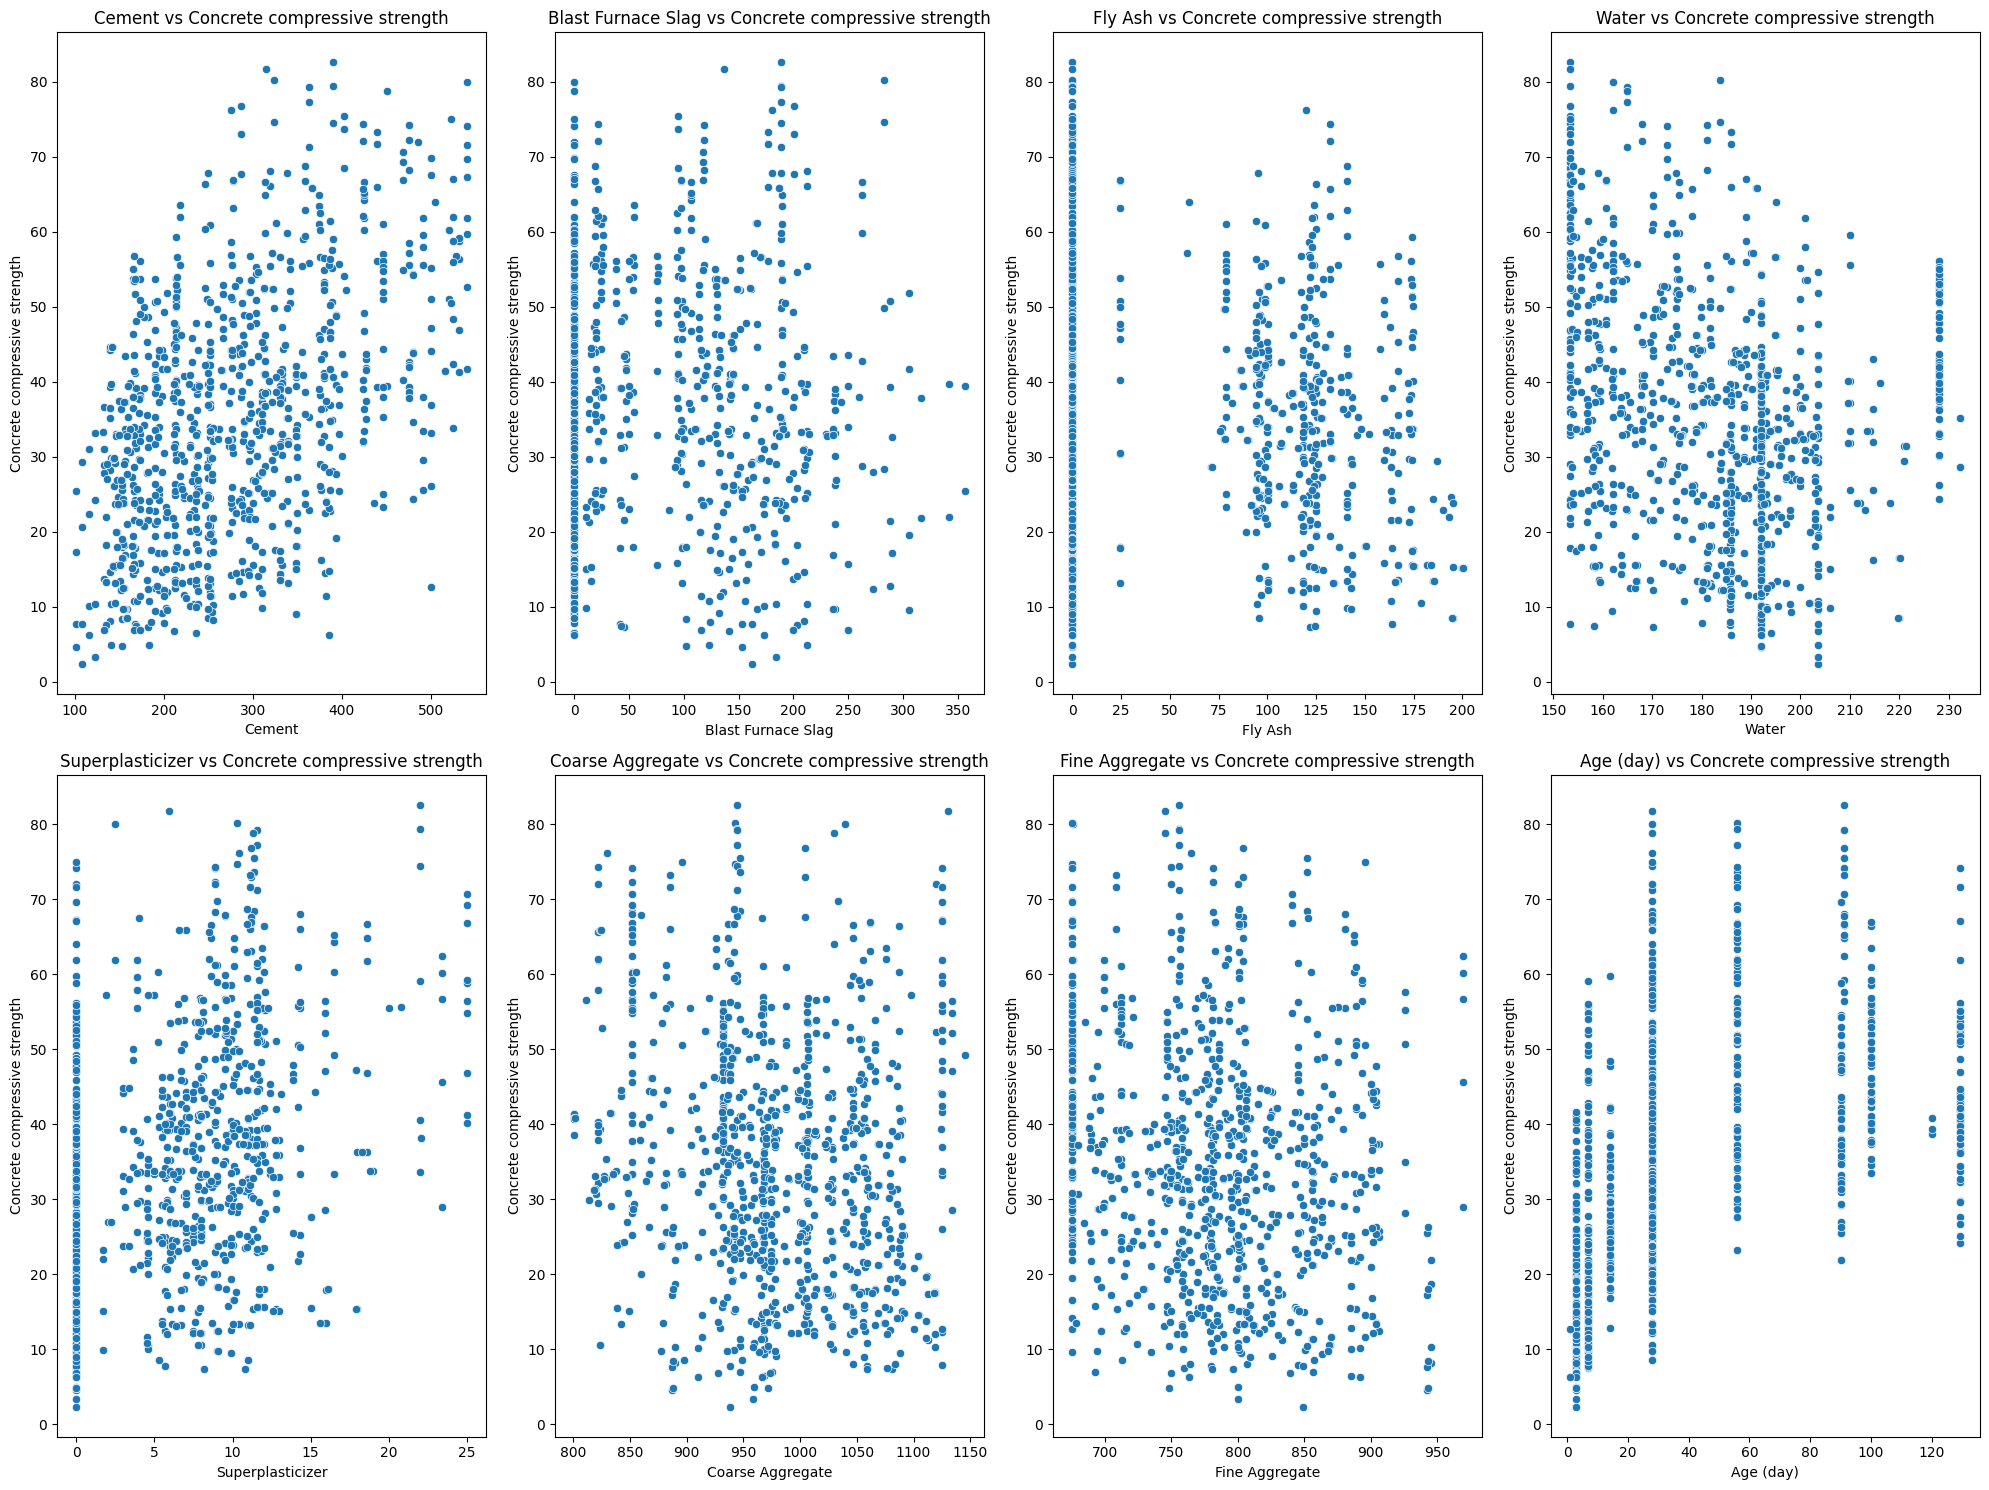

In [ ]:
plt.figure(figsize=(20, 15))  # Increase the figure size
for i, col in enumerate(out_df.columns[:-1]):  # Exclude the specific variable
    plt.subplot(2, 4, i + 1)  # Adjust the subplot layout as needed
    sns.scatterplot(data=out_df, x=col, y='Concrete compressive strength')
    plt.title(f'{col} vs Concrete compressive strength')
    plt.xlabel(col)
    plt.ylabel('Concrete compressive strength')
plt.tight_layout()
plt.show()

From the plots above, we can observe that the only column that has a somewhat linear relationship with the independent variable is 'Cement'. Rest of the columns do not exihibit any strong relationship with the target variable.

Checking Normality of columns by plotting QQ plots for each variable

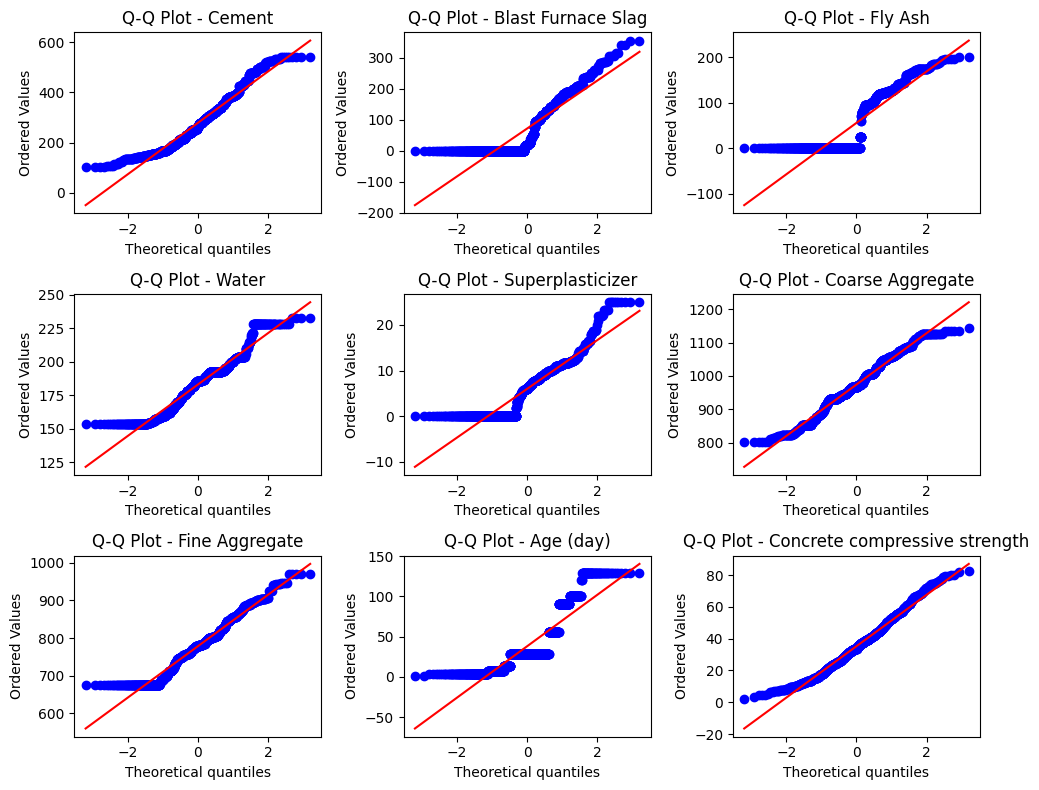

In [ ]:
import scipy.stats as sm

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Plot Q-Q plots
for i in range(9):
    sm.probplot(out_df.iloc[:,i], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot - {out_df.columns[i]}')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
for i in out_df.columns:
    skewness = round(out_df[i].skew(), 2)
    kurtosis = round(out_df[i].kurtosis(), 2)
    print(f'{i:<20} Skewness: {skewness:<10} Kurtosis: {kurtosis}')

Cement               Skewness: 0.56       Kurtosis: -0.43
Blast Furnace Slag   Skewness: 0.85       Kurtosis: -0.42
Fly Ash              Skewness: 0.5        Kurtosis: -1.37
Water                Skewness: 0.37       Kurtosis: -0.23
Superplasticizer     Skewness: 0.71       Kurtosis: 0.29
Coarse Aggregate     Skewness: -0.07      Kurtosis: -0.58
Fine Aggregate       Skewness: 0.24       Kurtosis: -0.56
Age (day)            Skewness: 1.28       Kurtosis: 0.56
Concrete compressive strength Skewness: 0.4        Kurtosis: -0.31


Plotting KDE plots for better visulalization

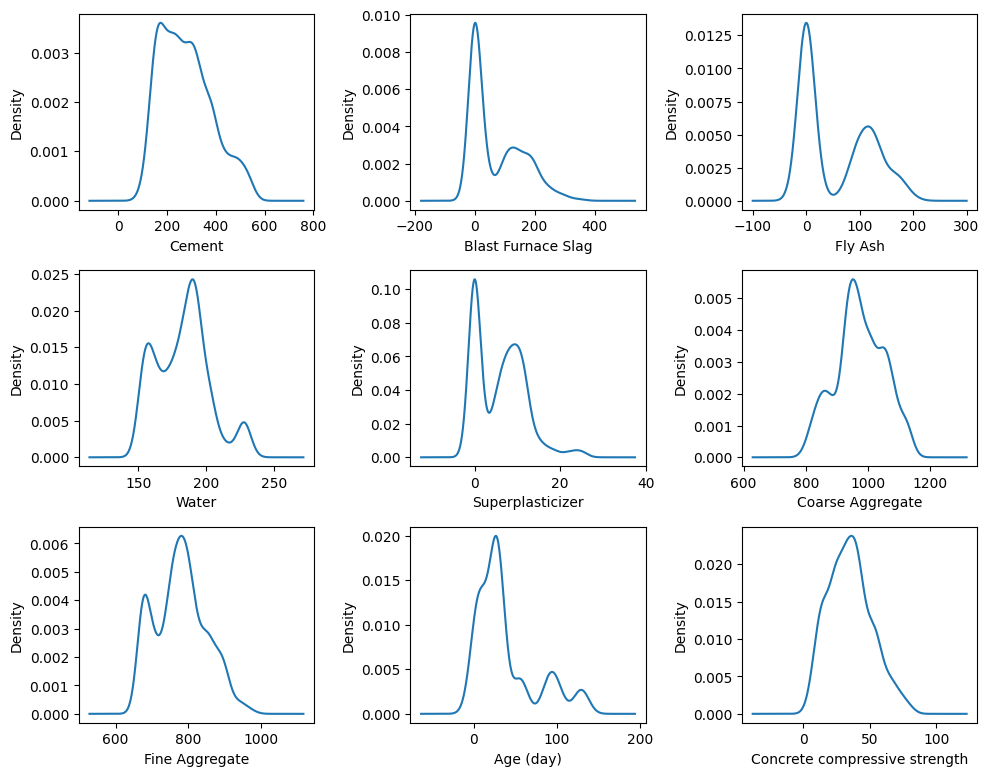

In [ ]:
plt.figure(figsize = (10,10), facecolor = 'white')
plotnumber = 1
for i in out_df.columns:
    ax = plt.subplot(4,3, plotnumber)
    out_df[i].plot(kind='kde')
    plt.xlabel(i, fontsize = 10)
    plotnumber +=1
plt.tight_layout()
plt.show()

Applying box-cox transformation to the columns

In [ ]:
out_df_copy=out_df.copy()
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='box-cox')
out_df_transformed=pd.DataFrame(pt.fit_transform(out_df_copy+0.0000001),columns=out_df_copy.columns)

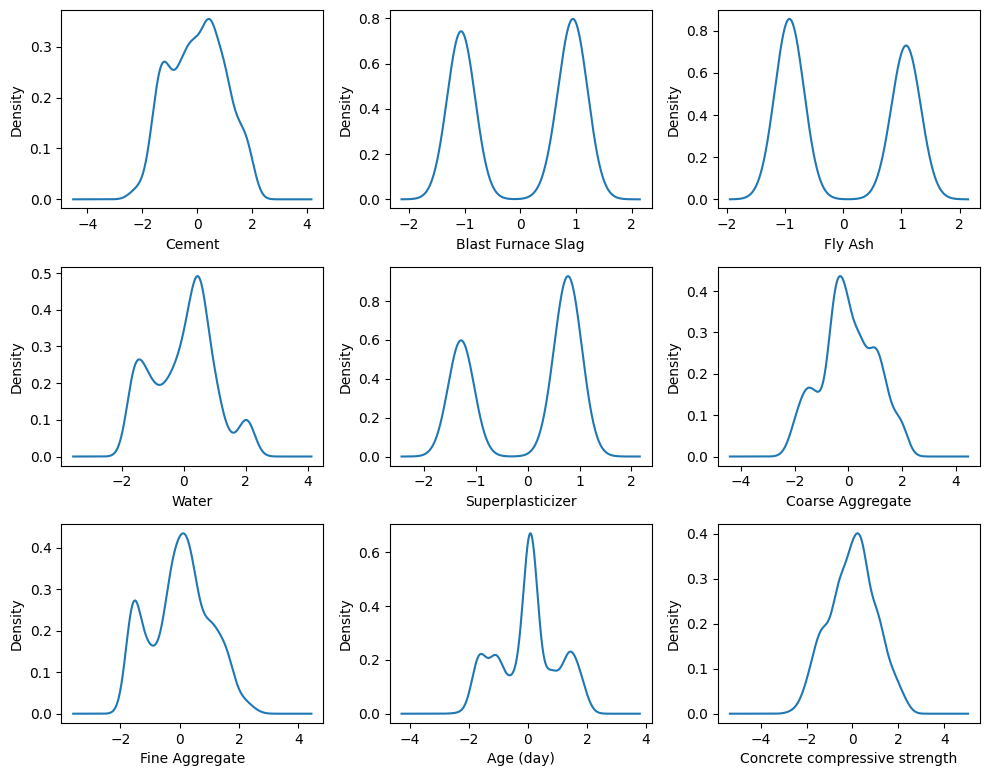

In [ ]:
plt.figure(figsize = (10,10), facecolor = 'white')
plotnumber = 1
for i in out_df_transformed.columns:
    ax = plt.subplot(4,3, plotnumber)
    out_df_transformed[i].plot(kind='kde')
    plt.xlabel(i, fontsize = 10)
    plotnumber +=1
plt.tight_layout()
plt.show()

Checking the skewness and kurtosis again

In [ ]:
for i in out_df_transformed.columns:
    skewness = round(out_df_transformed[i].skew(), 2)
    kurtosis = round(out_df_transformed[i].kurtosis(), 2)
    print(f'{i:<20} Skewness: {skewness:<10} Kurtosis: {kurtosis}')

Cement               Skewness: -0.01      Kurtosis: -0.85
Blast Furnace Slag   Skewness: -0.12      Kurtosis: -1.97
Fly Ash              Skewness: 0.15       Kurtosis: -1.98
Water                Skewness: 0.01       Kurtosis: -0.64
Superplasticizer     Skewness: -0.49      Kurtosis: -1.74
Coarse Aggregate     Skewness: -0.02      Kurtosis: -0.59
Fine Aggregate       Skewness: 0.01       Kurtosis: -0.74
Age (day)            Skewness: -0.06      Kurtosis: -0.74
Concrete compressive strength Skewness: -0.06      Kurtosis: -0.47


##Fitting the Model using Linear Regression

In [ ]:
X=out_df_transformed.iloc[:,:-1]
y=out_df_transformed.iloc[:,-1]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 0.32149806479575993
MSE 0.1673593239013553
R2 score 0.8336123056352251


###Using statsmodels library for OLS regression

In [ ]:
import statsmodels.api as sm
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.2,random_state=3)
X_constant=sm.add_constant(X_train1)
modelo = sm.OLS(list(y_train1), X_constant)

In [ ]:
print(modelo.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     463.6
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          2.34e-293
Time:                        16:45:11   Log-Likelihood:                -443.01
No. Observations:                 804   AIC:                             904.0
Df Residuals:                     795   BIC:                             946.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0012      0

##Using Gradient Descent

In [ ]:
class GDRegressor:

    def __init__(self,learning_rate=0.01,epochs=100):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X_train,y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)

            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [ ]:
gdr = GDRegressor(epochs=1000,learning_rate=0.05)

In [ ]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.2,random_state=3)
gdr.fit(X_train2,y_train2)

0.001170114688970186 [ 0.46643438  0.22382957 -0.02474681 -0.33872763  0.15638938 -0.07307881
 -0.1711411   0.62989304]


In [ ]:
y_pred2 = gdr.predict(X_test2)

In [ ]:
print("MAE",mean_absolute_error(y_test2,y_pred2))
print("MSE",mean_squared_error(y_test2,y_pred2))
print("R2 score",r2_score(y_test2,y_pred2))

MAE 0.3214983381165451
MSE 0.16735942946556576
R2 score 0.8336122006838834


###Using Stochastic Gradient Descent


In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
reg = SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)

In [ ]:
X_train3,X_test3,y_train3,y_test3 = train_test_split(X,y,test_size=0.2,random_state=3)
reg.fit(X_train3,y_train3)

SGDRegressor(learning_rate='constant', max_iter=100)

In [ ]:
y_pred3 = reg.predict(X_test3)

In [ ]:
print("MAE",mean_absolute_error(y_test3,y_pred3))
print("MSE",mean_squared_error(y_test3,y_pred3))
print("R2 score",r2_score(y_test3,y_pred3))

MAE 0.3293416904777534
MSE 0.17539791329112267
R2 score 0.8256203854760776


#**Mean of Residuals**

Residuals are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. Let us check this assumption.

In [ ]:
residuals=y_test.values-y_pred
residuals2=y_test2.values-y_pred2
residuals3=y_test3.values-y_pred3
mean_residuals=np.mean(residuals2)
mean_residuals2=np.mean(residuals2)
mean_residuals3=np.mean(residuals3)
print("Mean of Residuals OLS: ",mean_residuals)
print("Mean of Residuals GD: ",mean_residuals2)
print("Mean of Residuals SGD: ",mean_residuals3)

Mean of Residuals OLS:  -0.0058505522266402
Mean of Residuals GD:  -0.0058505522266402
Mean of Residuals SGD:  0.023789693847159378


# **Residual Analysis**

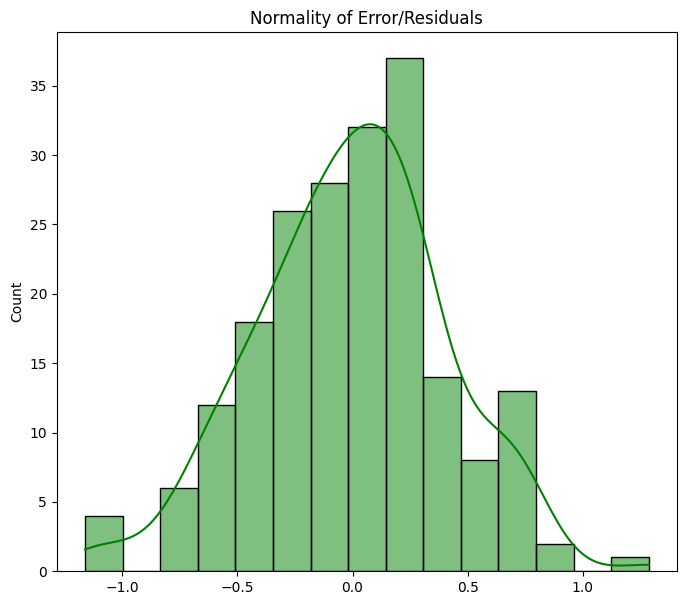

In [ ]:
plt.figure(figsize=(8,7))
sns.histplot(residuals, kde = True, color = 'g')
plt.title('Normality of Error/Residuals')
plt.show()

It can be clearly seen that the residual terms are pretty much normally distributed for the number of test points we took.

# **Homoscedasticity**


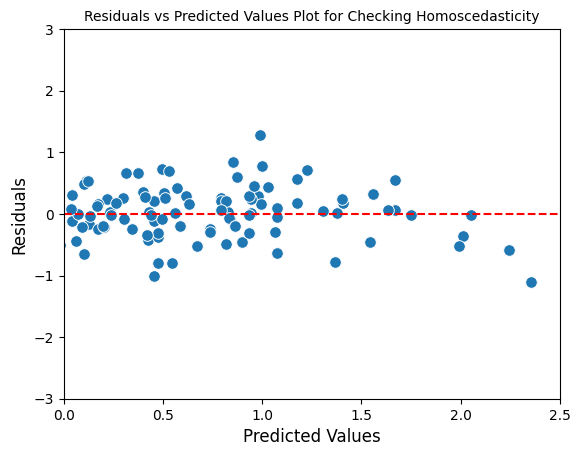

In [ ]:
p =sns.scatterplot(x=y_pred, y=residuals,s=70)
plt.xlabel('Predicted Values',fontsize=12)
plt.ylabel('Residuals',fontsize=12)
plt.ylim(-3, 3)
plt.xlim(0, 2.5)

p = plt.axhline(y=0, color='red', linestyle='--')

p = plt.title('Residuals vs Predicted Values Plot for Checking Homoscedasticity',fontsize=10)
plt.show()

# **Multicollinearity**

Multicollinearity in a regression model refers to the situation where two or more independent variables in the model are highly correlated with each other. Linear regression assumes little to no multicollinearity among input variables. Let us check this assumption by plotting a correlation heatmap.

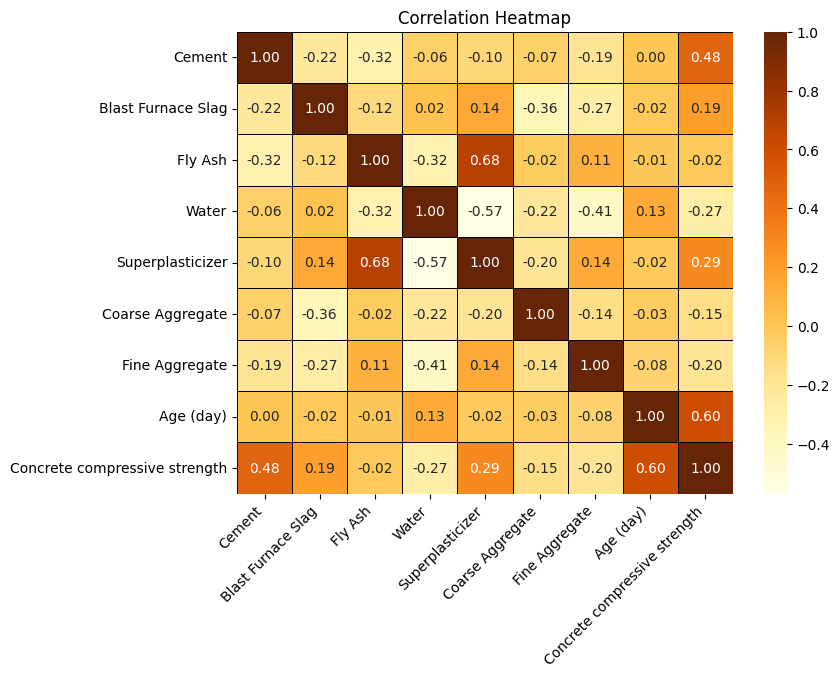

In [ ]:
correlation_matrix = out_df_transformed.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,cmap='YlOrBr', fmt=".2f", linewidths=0.5, linecolor='black')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap')

plt.show()

Let us also find the VIF scores of various input features. It should be less than 4 to depict little to no multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X_vif = out_df_transformed[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age (day)']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]

print(vif_data)

              feature       VIF
0              Cement  1.966933
1  Blast Furnace Slag  2.222387
2             Fly Ash  2.685290
3               Water  3.324775
4    Superplasticizer  3.484741
5    Coarse Aggregate  2.335629
6      Fine Aggregate  2.435117
7           Age (day)  1.025167


Since each VIF score is less than 4, we can conclude that there is no significant multicollinearity among the independent variables.